# Análisis de correlaciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
# Función para realizar un gráfico de caja (el cual muestra el máximo, mínimo, mediana, cuartiles y outliers)

def boxplot(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    medianprops = dict(linestyle='-', linewidth=4, color='k')
    plot= datos.plot(kind='box',figsize=tamanio,fontsize=18,color=color,medianprops=medianprops)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)

In [3]:
#Función para realizar un gráfico de barras horizontales con datos de series

def hbarplot(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18,color=color)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)
    plot.margins(x=0.1)
    for index,item in enumerate(plot.patches):
        plot.text(item.get_width()+.3,item.get_y()+.1,str(datos.iloc[index]),fontsize=15)

In [4]:
#Función para realizar un gráfico de barras verticales con datos de series

def barplot(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='bar',figsize=tamanio,fontsize=18,color=color)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plt.xticks(rotation='horizontal')
    plot.set_ylabel(etiqueta_y,fontSize=18)
    plot.margins(x=0.1)
    for index,item in enumerate(plot.patches):
        plot.text(item.get_x()-.03, item.get_height()+.5,str(datos.iloc[index]),fontsize=15)

In [5]:
#Función para realizar un histograma con datos de series

def hist(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='hist',figsize=tamanio,fontsize=18,color=color,bins=80)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    #plt.xticks(rotation='horizontal')
    plot.set_ylabel(etiqueta_y,fontSize=18)

In [6]:
#Función para realizar un gráfico de barras horizontales con datos de dataframe

def hbarplotdf(datos,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)

In [7]:
#Función para realizar un gráfico de puntos en el cual una de las variables es categórica con datos de dos series

def stripplot(dato1,dato2,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plt.figure(figsize=(15, 15))
    plot=sns.stripplot(dato1,dato2, jitter=0.2, size=2)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)

In [8]:
# Importamos librerías de análisis de datos
dataframe = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

## Análisis de correlación de todos los datos

Dos variables se correlacionan positivamente si cuando una variable aumenta, la otra tiende a aumentar

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text xticklabel objects>)

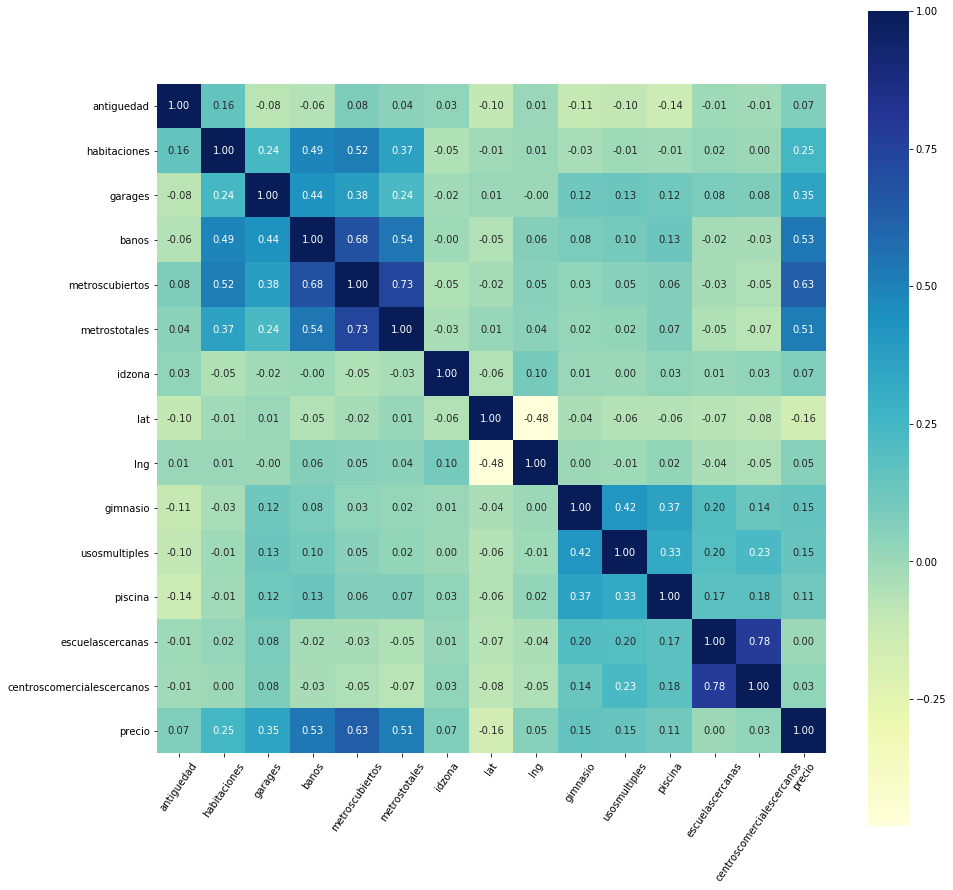

In [13]:
plt.figure(figsize=(15, 15))
sns.heatmap(dataframe.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=55)

A continuación se muestra un cuadro con los cuatro pares de variables con mayor correlación positiva y su análisis:

|Variable 1 | Variable 2 |Correlacion |Análisis |
|:-|:-|:-|:-|
|centroscomercialescercanos|escuelascercanas|78|Las propiedades que están cerca a centros comerciales tienden a estar cerca de escuelas|
|metrostotales|metroscubiertos|73|Las propiedades con más metros cubiertos tienden a ser las que tienen más metros totales|
|banos|metroscubiertos|68|Las propiedades más grándes tienden a tener más baños que las propiedades chicas|
|precio|metroscubiertos|63|Las propiedades más grandes tienden a ser más caras que las propiedades más chicas|

## Análisis de correlación entre metros cubiertos y metros totales 

Text(0.5, 1.0, 'Correlación entre metros cubiertos y metros totales')

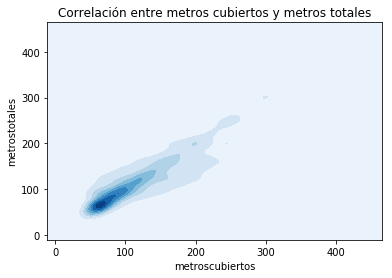

In [18]:
dato=dataframe.dropna(subset=['metrostotales','metroscubiertos'])
# 2D density plot:
sns.kdeplot(dato['metroscubiertos'], dato['metrostotales'], cmap="Blues", shade=True)
plt.title('Correlación entre metros cubiertos y metros totales', loc='center')
plt.xticks(rotation='horizontal')

Del análisis del gráfico se puede observar que: 
* Como se explicó anteriormente hay una tendencia en la cual a medida que las propiedades tienen más metros cubiertos, las mismas tienen más metros totales
* El gradiente de color indica que hay una mayor cantidad de propiedades con pocos metros cubiertos y totales, y que a medida que aumentan los metros cubiertos y totales la cantidad de propiedades disminuye (es decir que tiende a haber más casas chicas que casas grandes publicadas)

## Análisis de correlación entre cantidad de baños y metros cubiertos

Como la variable cantidad de baños es categórica primero voy a gráficar cuantas propiedades hay con 1,2,3 y 4 baños para comprender mejor estos datos.

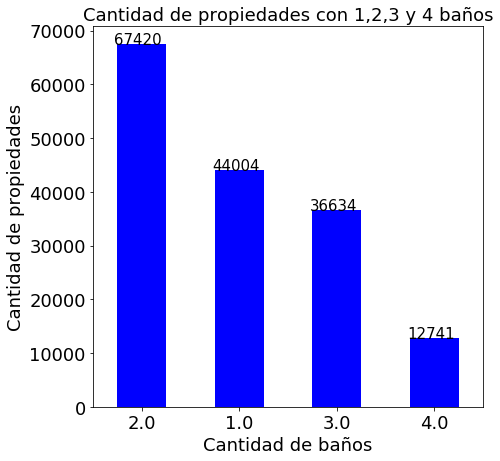

In [19]:
barplot(datos=dato['banos'].value_counts(),color='blue',titulo='Cantidad de propiedades con 1,2,3 y 4 baños',etiqueta_x='Cantidad de baños',etiqueta_y='Cantidad de propiedades',tamanio=(7,7))

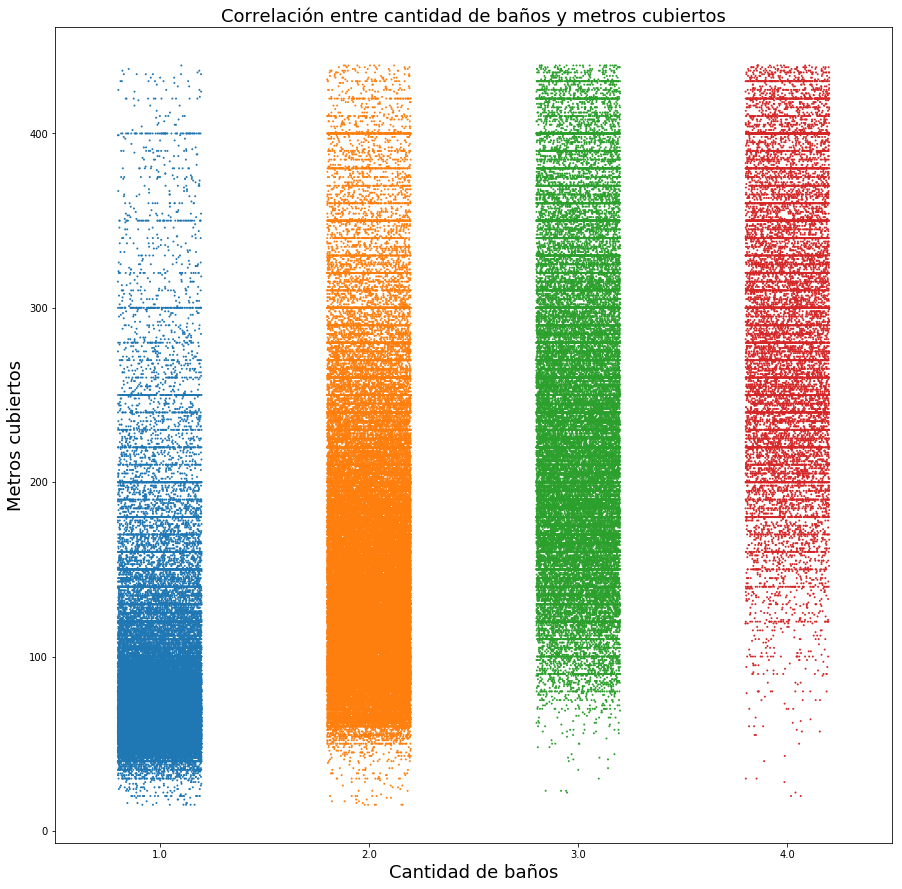

In [20]:
dato=dataframe.dropna(subset=['metroscubiertos','banos'])
stripplot(dato['banos'],dato['metroscubiertos'],'Correlación entre cantidad de baños y metros cubiertos','Cantidad de baños','Metros cubiertos')

Del análisis del gráfico se puede observar que: 
* La cantidad de propiedades con 2 baños es mayor a las que tienen 1 baño y además son las propiedades más publicadas
* A su vez la cantidad de propiedades con 1 baño es mayor a las que tienen 3 baños y hay más propiedades con 3 baños que propiedades con 4 baños
* Como se explicó anteriormente hay una tendencia en la cual a medida que las propiedades tienen más baños, la cantidad de metros cubiertos es mayor
* Es curioso que en el gráfico hay una cierta cantidad de propiedades con muchos metros cubiertos y tan solo 1 o 2 baños, aunque está claro que son las propiedades con muchos metros cubiertos las que tienen más baños (esto podría explicarse en que tal vez esas propiedades no se usan como vivienda sino como garages o galpones por ejemplo)

A continuación voy a analizar cuantas propiedades de cada tipo tienen un baño y más de 400 metros cubiertos para chequear si son viviendas o no:

In [21]:
#Quiero analizar las propiedades con más de 400 metros cubiertos que tengan un solo baño para ver de que tipo son
grandesconunbano=dataframe[((dataframe['banos']==1.0) & (dataframe['metroscubiertos']>400.0))]
#grandesconunbano=dataframe[((dataframe['banos']<=2.0) & (dataframe['metroscubiertos']>350.0))]
#df3=df2.loc[:,['tipodepropiedad','metroscubiertos']].sort_values('metroscubiertos', ascending=False)
grandesconunbano['tipodepropiedad'].value_counts()

Casa                             28
Bodega comercial                  9
Local Comercial                   8
Casa en condominio                4
Casa uso de suelo                 3
Villa                             2
Edificio                          2
Terreno                           2
Inmuebles productivos urbanos     1
Apartamento                       1
Terreno comercial                 1
Name: tipodepropiedad, dtype: int64

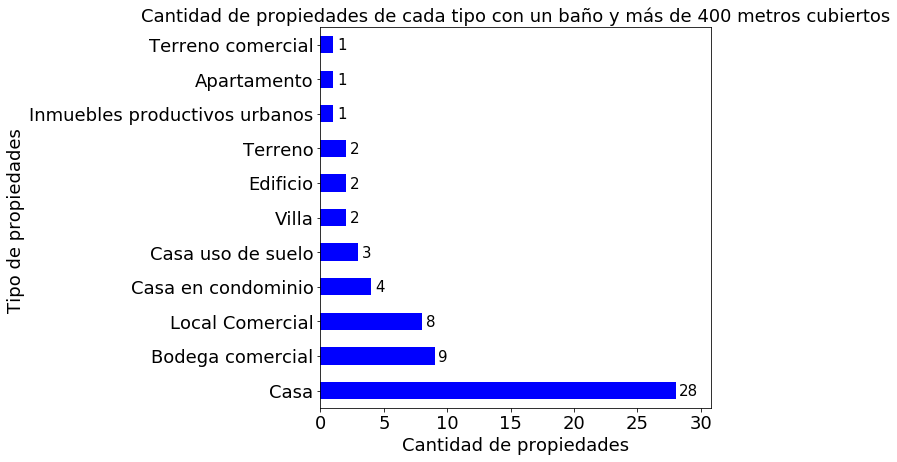

In [22]:
hbarplot(datos=grandesconunbano['tipodepropiedad'].value_counts(),color='blue',titulo='Cantidad de propiedades de cada tipo con un baño y más de 400 metros cubiertos',etiqueta_x='Cantidad de propiedades',etiqueta_y='Tipo de propiedades ',tamanio=(7,7))

* Al contrario que lo que indicaría la intuición, la mayor parte de las propiedades con más de 400 metros cubiertos y un solo baño corresponden a casas

## Análisis de correlación entre metros cubiertos y precio

Text(0.5, 1.0, 'Correlación entre metros cubiertos y precio')

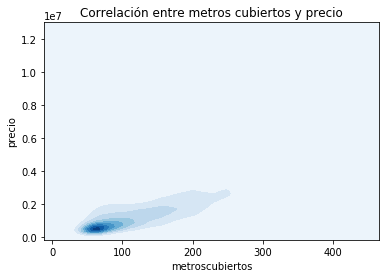

In [23]:
dato=dataframe.dropna(subset=['metroscubiertos','precio'])
# 2D density plot:
sns.kdeplot(dato['metroscubiertos'], dato['precio'], cmap="Blues", shade=True)
plt.title('Correlación entre metros cubiertos y precio', loc='center')

Del análisis del gráfico se puede observar que: 
* Como se explicó anteriormente hay una tendencia en la cual a medida que las propiedades tienen más metros cubiertos, las mismas son más caras
* El gradiente de color indica que hay una mayor cantidad de propiedades con pocos metros cubiertos y más baratas, y que a medida que aumentan los metros cubiertos y los precios la cantidad de propiedades disminuye (es decir que tiende a haber más casas chicas y baratas que casas grandes y caras publicadas)
* Adicionalmente se puede ver que la relación creciente entre los metros cubiertos y el precio tiene una pendiente menor a la relación creciente entre los metros cubiertos y los metros totales (mostrados en un gráfico anterior) justamente porque la correlación entre metros cubiertos y metros totales es de 73 y en cambio la correlación entre metros cubiertos y precios es de 63 (o sea la correlación es menor)